# 1.Load your zillow dataset.

In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import explore
import wrangle as w
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression
from math import sqrt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import explore as e
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# Acquire data

In [6]:
df = w.get_zillow_data()
df

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate,price_per_sqft,age
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA,0.023417,81.592348,12.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA,0.012085,523.314815,6.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA,0.012253,311.391430,91.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA,0.017192,4.440000,45.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA,0.036874,40.467836,44.0
...,...,...,...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,LA,0.032854,96.548571,2.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange,0.014046,424.737401,2.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange,0.011648,171.429805,3.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange,0.012496,214.971125,2.0


# Prepare data

In [7]:
train, validate, test, train_scaled, validate_scaled, test_scaled = e.zillow_prepared(df)
train.describe()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,tax_rate,price_per_sqft,age
count,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06
mean,3.283025e+00,2.187977e+00,1.797768e+03,3.963180e+05,1.960722e+03,4.844790e+03,1.287139e-02,2.221708e+02,5.627804e+01
std,8.918959e-01,8.624930e-01,7.599109e+02,2.933902e+05,2.171821e+01,3.372512e+03,1.987959e-03,1.339147e+02,2.171821e+01
min,0.000000e+00,0.000000e+00,2.000000e+01,5.490000e+02,1.865000e+03,6.340000e+00,4.345669e-03,2.016225e+00,1.000000e+00
25%,3.000000e+00,2.000000e+00,1.260000e+03,1.930692e+05,1.949000e+03,2.566823e+03,1.174083e-02,1.284174e+02,4.200000e+01
50%,3.000000e+00,2.000000e+00,1.615000e+03,3.263185e+05,1.958000e+03,4.059190e+03,1.238818e-02,2.019985e+02,5.900000e+01
75%,4.000000e+00,3.000000e+00,2.162000e+03,5.170052e+05,1.975000e+03,6.174760e+03,1.346824e-02,2.943400e+02,6.800000e+01
max,7.000000e+00,6.500000e+00,5.964000e+03,1.887497e+06,2.016000e+03,2.092198e+04,2.103304e-02,9.608401e+02,1.520000e+02


In [8]:
# export train
train.to_csv('zillow_train.csv')



# 2.Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

* Here is some sample code to get you started:


* from sklearn.linear_model import LinearRegression

 * assuming X and y are already defined
 * model = LinearRegression().fit(X, y)
 * predictions = model.predict(X)
* Modify and add to the code above as necessary for it to work with the zillow dataset.

In [5]:
# create the model object
train = train[['area', 'taxvalue']].copy()
X = train[['area']]
y = train[['taxvalue']]
model = LinearRegression().fit(X, y)

In [6]:
# make predictions
predictions = model.predict(X)
train['yhat'] = predictions


# 3.Plot the residuals for the linear regression model that you made.

In [7]:
# baseline prediction
baseline = train.taxvalue.mean()
baseline

train['residual'] = train.yhat - train.taxvalue

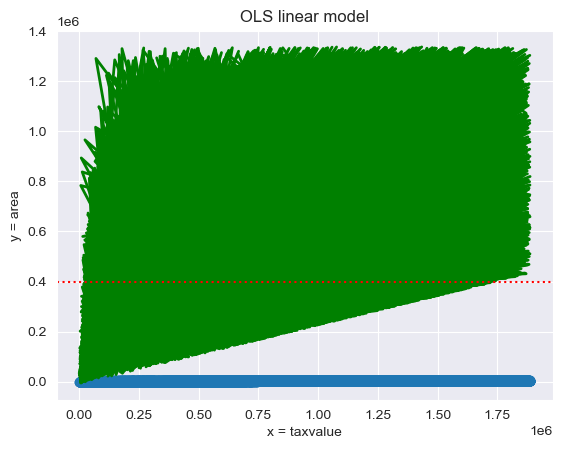

In [8]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.taxvalue, train.area)

#lineplot is my regression line
plt.plot(train.taxvalue, train.yhat, color='green', linewidth=2)
plt.axhline(baseline, ls=':', color='red')
plt.xlabel('x = taxvalue')
plt.ylabel('y = area')
plt.title('OLS linear model')
plt.show()

<Axes: xlabel='taxvalue', ylabel='residual'>

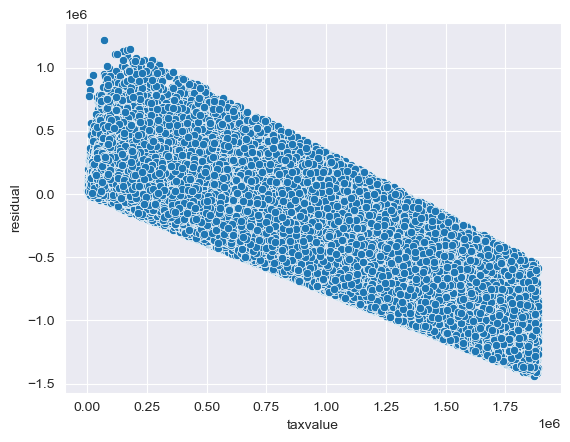

In [9]:
sns.scatterplot(x='taxvalue', y='residual', data=train)

<Axes: xlabel='area', ylabel='residual'>

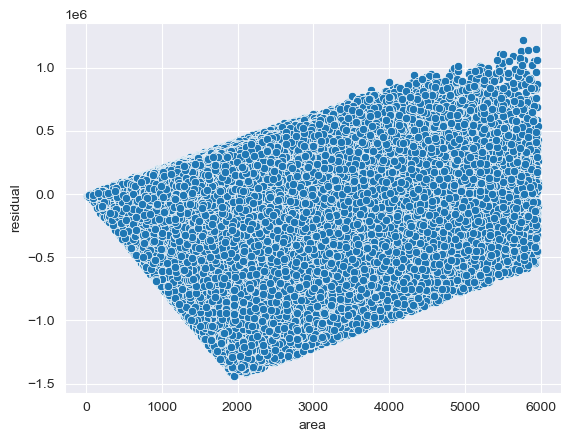

In [10]:
sns.scatterplot(x='area', y='residual', data=train)


Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
# sum of squared errors
SSE = (train.residual**2).sum()
SSE

6.883322916518955e+16

In [12]:
# RMSE
MSE = SSE/len(train)
RMSE = sqrt(MSE)
RMSE

238046.24681500875

In [13]:
# explained sum of squares
ESS = ((train.yhat - train.taxvalue.mean())**2).sum()
ESS

3.572696564208901e+16

In [14]:
# total sum of squares
TSS = ((train.taxvalue - train.taxvalue.mean())**2).sum()
TSS

1.0456019480725854e+17

In [15]:
# mean squared error
MSE = SSE/len(train)
MSE

56666015622.71207


Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [16]:
# sum of squared errors
SSE_baseline = ((train.taxvalue - train.taxvalue.mean())**2).sum()
SSE_baseline

1.0456019480725854e+17

In [17]:
# mean squared error
MSE_baseline = SSE_baseline/len(train)
MSE_baseline

86077752043.89705

In [18]:
# root mean squared error
RMSE_baseline = sqrt(MSE_baseline)
RMSE_baseline

293390.1021573445


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [19]:
# sum of squared errors for baseline model
SSE_baseline = ((train.taxvalue - train.taxvalue.mean())**2).sum()
SSE_baseline


1.0456019480725854e+17

In [20]:
# sum of squared errors for OLS model
SSE = (train.residual**2).sum()
SSE

6.883322916518955e+16

In [21]:
# compare SSE_baseline to SSE from OLS model
SSE < SSE_baseline


True


What is the amount of variance explained in your model?
The amount of variance explained in the model is the R-squared value.



Is your model better than the baseline model?
Yes, the model is better than the baseline model because the SSE is less than the SSE_baseline.


Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [22]:
def plot_residuals(y, yhat):
    '''
    This function takes in the actual values of y and the predicted values of yhat
    and creates a residual plot
    '''
    residual = yhat - y
    plt.scatter(y, residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('y')
    plt.ylabel('residual')
    plt.title('OLS model residuals')
    plt.show()

In [23]:
def regression_errors(y, yhat):
    '''
    This function takes in the actual values of y and the predicted values of yhat
    and returns the SSE, ESS, TSS, MSE, and RMSE
    '''
    # sum of squared errors
    SSE = (yhat - y).sum()
    # explained sum of squares
    ESS = ((yhat - y.mean())**2).sum()
    # total sum of squares
    TSS = ((y - y.mean())**2).sum()
    # mean squared error
    MSE = SSE/len(y)
    # root mean squared error
    RMSE = sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE


In [24]:
def baseline_mean_errors(y):
    '''
    This function takes in the actual values of y and returns the SSE, MSE, and RMSE
    for the baseline model
    '''
    # sum of squared errors for baseline model
    SSE_baseline = ((y - y.mean())**2).sum()
    # mean squared error for baseline model
    MSE_baseline = SSE_baseline/len(y)
    # root mean squared error for baseline model
    RMSE_baseline = sqrt(MSE_baseline)
    return SSE_baseline, MSE_baseline, RMSE_baseline


In [25]:
def better_than_baseline(y, yhat):
    '''
    This function takes in the actual values of y and the predicted values of yhat
    and returns true if the model performs better than the baseline, otherwise false
    '''
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    return SSE < SSE_baseline



In [26]:
def linear_model_predictions(df):
    '''
    This function takes in the actual values of X and y
    and returns the predictions of y using OLS linear model
    '''
    X = df[['area']]
    y = df.taxvalue
    # create the model object
    model = LinearRegression()
    # make predictions
    predictions = model.predict(X)
    train['yhat'] = predictions
    train['residual'] = train.yhat - train.taxvalue
    # sum of squared errors
    SSE = (train.yhat - y).sum()
    # explained sum of squares
    ESS = ((train.yhat - y.mean())**2).sum()
    # total sum of squares
    TSS = ((y - y.mean())**2).sum()
    # mean squared error
    MSE = SSE/len(y)
    # root mean squared error
    RMSE = sqrt(MSE)
    # sum of squared errors for baseline model
    SSE_baseline = ((y - y.mean())**2).sum()
    # mean squared error for baseline model
    MSE_baseline = SSE_baseline/len(y)
    # root mean squared error for baseline model
    RMSE_baseline = sqrt(MSE_baseline)


    print("SSE = ", SSE)
    print("ESS = ", ESS)
    print("TSS = ", TSS)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("SSE_baseline = ", SSE_baseline)
    print("MSE_baseline = ", MSE_baseline)
    print("RMSE_baseline = ", RMSE_baseline)
    print("better_than_baseline = ", better_than_baseline(y, train.yhat))






In [27]:
train = train[['area', 'taxvalue']].copy()

In [28]:

linear_model_predictions(train)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.